# AR

In [ ]:
# first step: Autoregression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

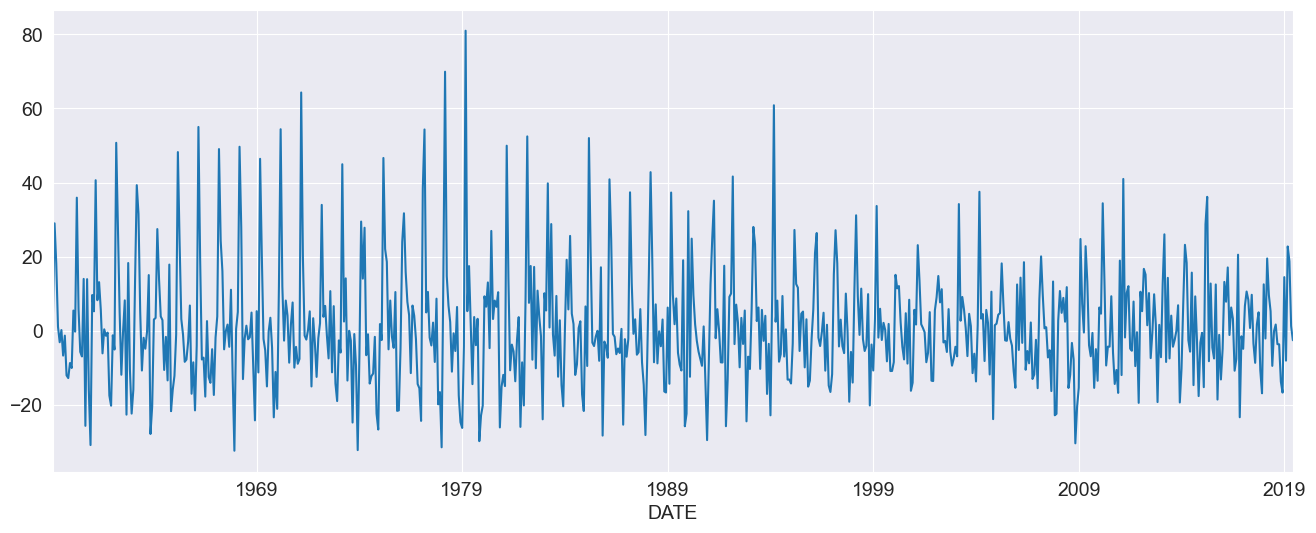

In [3]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
housing = 100* housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [ ]:
# focus on first 10 years

semiHouse = housing[:'1969-01-01']
semiHouse.plot()

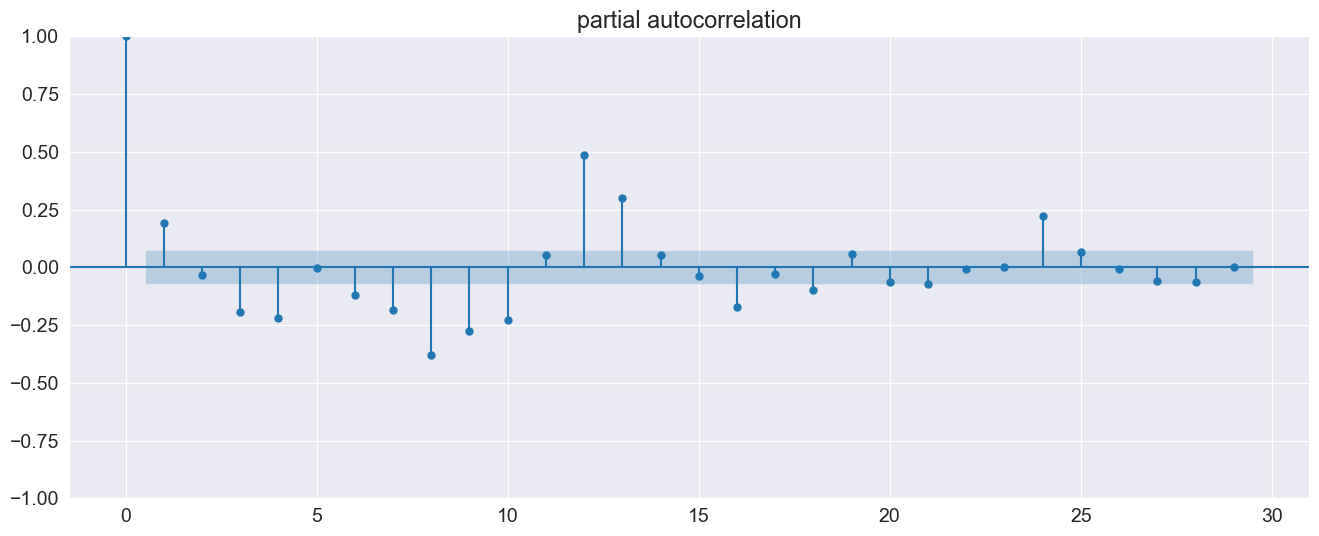

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(housing, title='partial autocorrelation')
plt.show()

In [16]:
# we start with AR(p=3)
mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Fri, 10 Jan 2025   AIC                           5996.884
Time:                        12:06:58   BIC                           6019.794
Sample:                    05-01-1959   HQIC                          6005.727
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [31]:
sel = ar_select_order(housing, 13, old_names=False)
sel.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [32]:
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Fri, 10 Jan 2025   AIC                           5382.314
Time:                        12:41:11   BIC                           5450.835
Sample:                    03-01-1960   HQIC                          5408.781
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

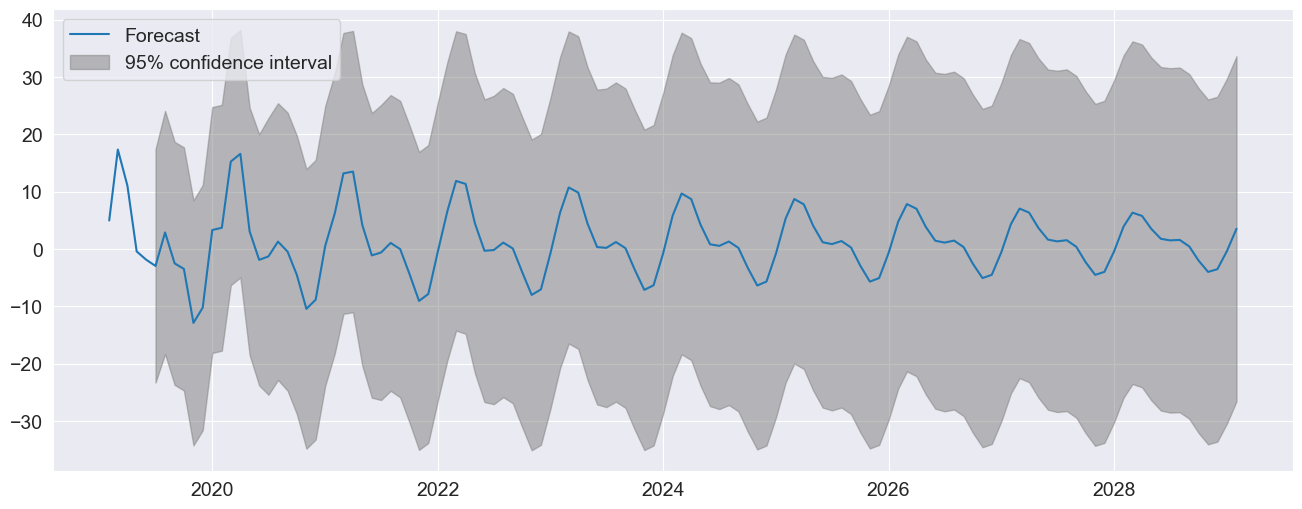

In [33]:
fig = res.plot_predict(720,840)

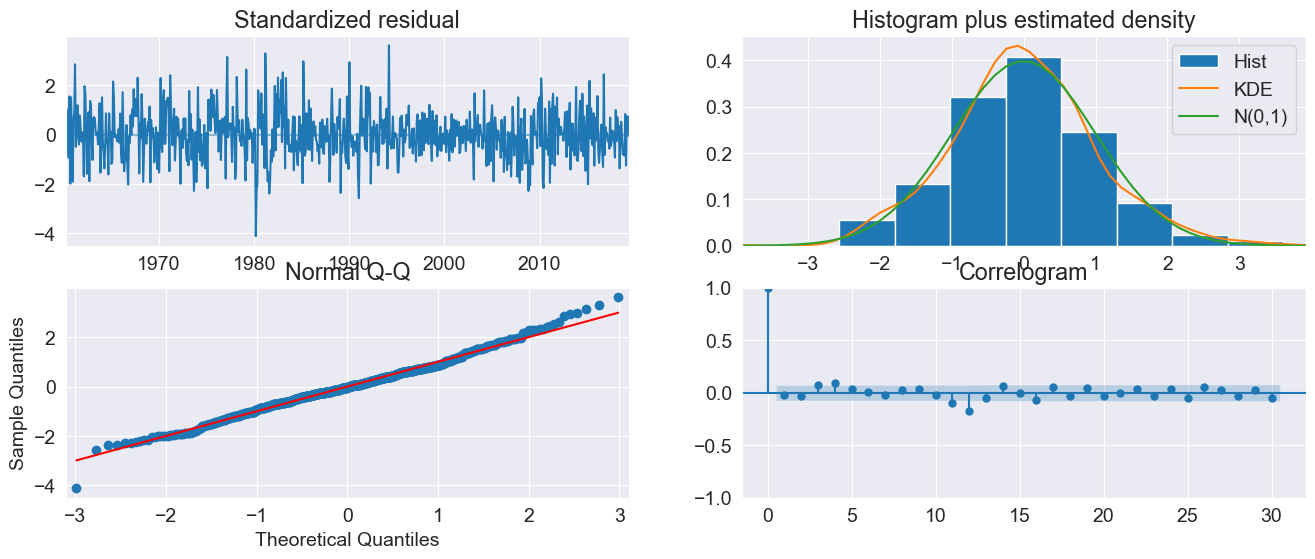

In [34]:
res.plot_diagnostics(lags=30)
plt.show()

In [28]:
# add seasonal dummies --> alternative way to model seasonality

sel = ar_select_order(housing, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Fri, 10 Jan 2025   AIC                           5335.112
Time:                        12:33:57   BIC                           5403.863
Sample:                    04-01-1959   HQIC                          5361.648
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2726      1.373      0.927      0.354      -1.418       3.963
s(2,12)        32.6477      1.824     17.901      0.000      29.073      36.222
s(3,12)        23.0685      2.435      9.472    

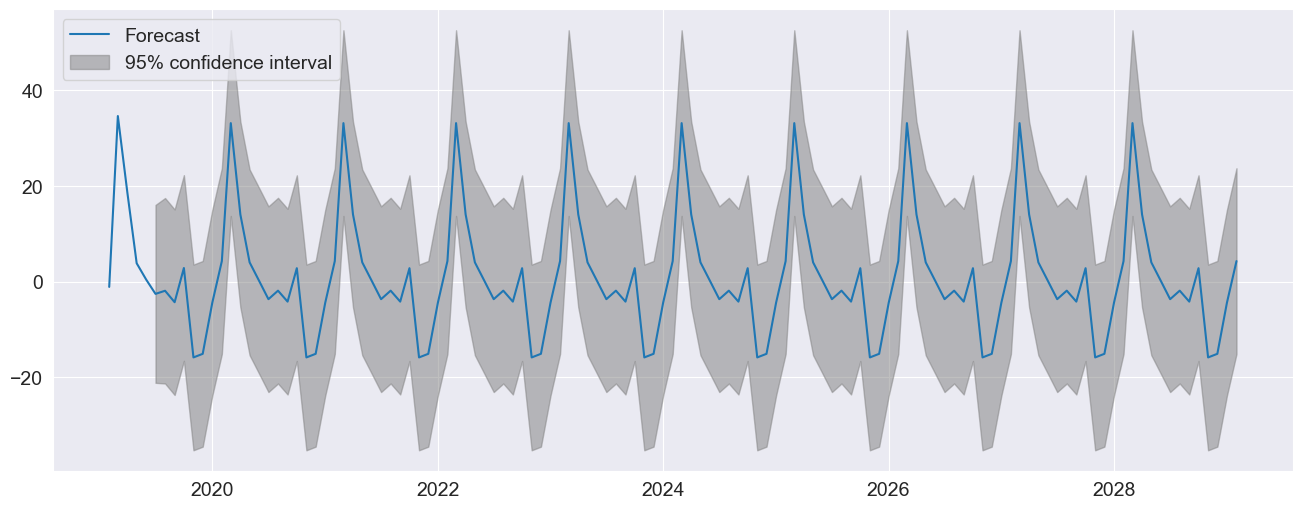

In [29]:
fig = res.plot_predict(720, 840)

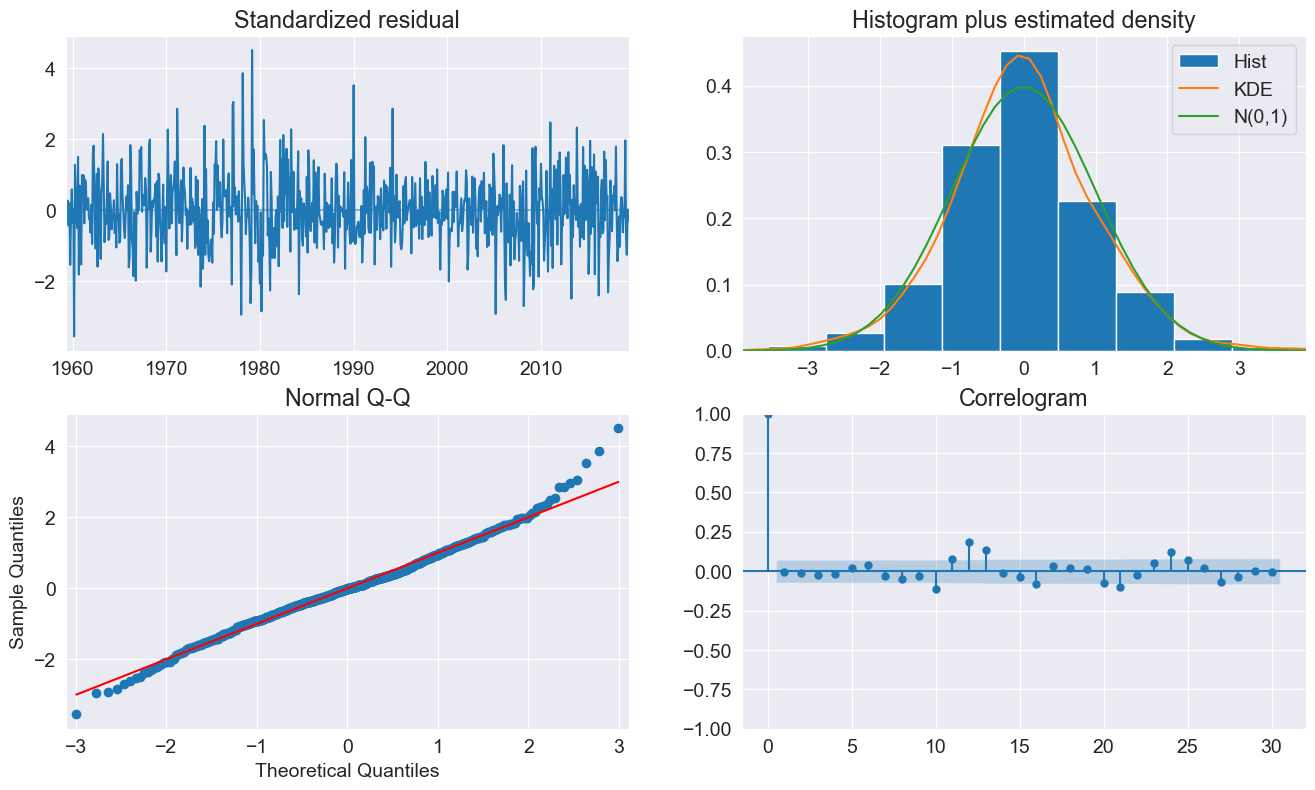

In [30]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)

### OTHER DATASET: INDUSTRIAL PRODUCTION

<Axes: xlabel='DATE'>

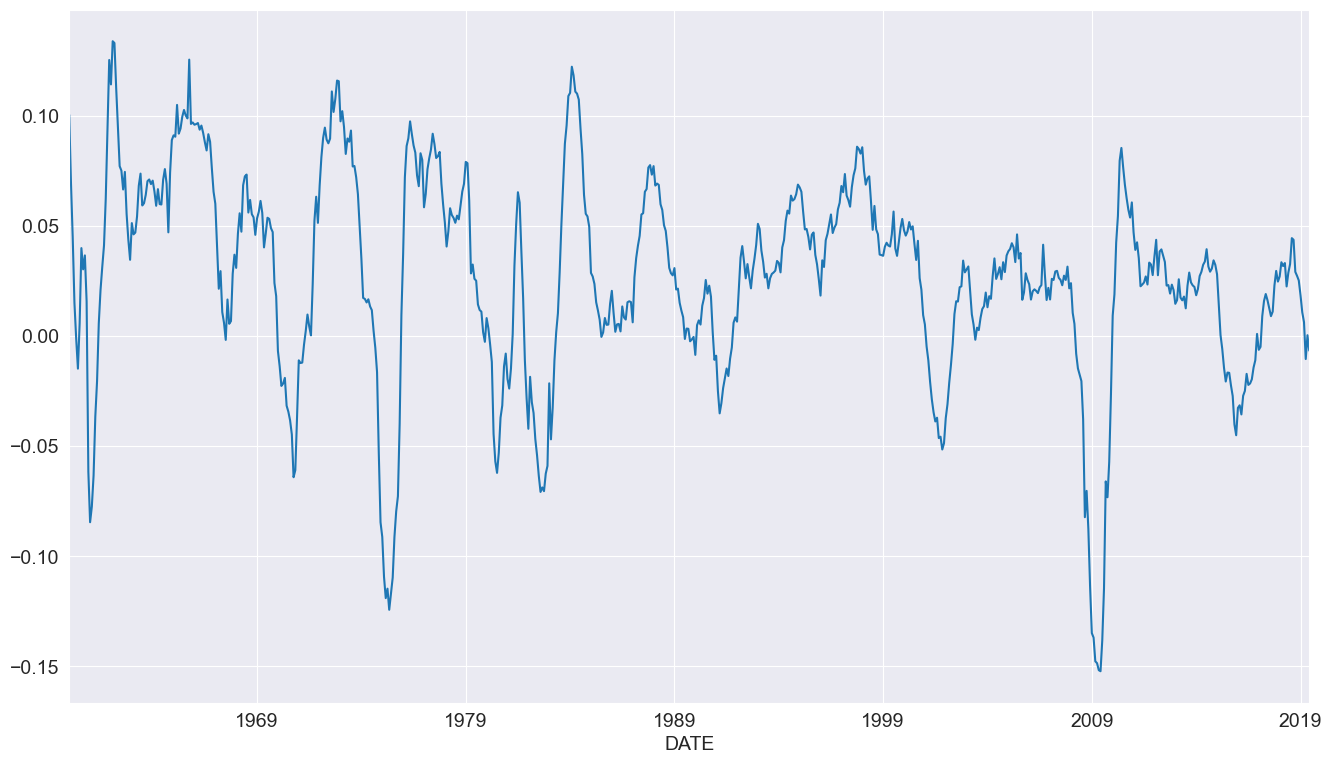

In [82]:
data = pdr.get_data_fred("INDPRO", "1959-01-01", "2019-06-01")
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq("MS")
_, ax = plt.subplots(figsize=(16, 9))
ind_prod.plot(ax=ax)

In [ ]:
subset = ind_prod[ind_prod.shape[0]-100:ind_prod.shape[0]]

sel = ar_select_order(ind_prod[:-100], 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2321.382
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 10 Jan 2025   AIC                          -4612.763
Time:                        16:00:43   BIC                          -4544.476
Sample:                    02-01-1961   HQIC                         -4586.368
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      2.783      0.005       0.000       0.002
INDPRO.L1      1.1577      0.035     33.179      0.000       1.089       1.226
INDPRO.L2     -0.0822      0.053     -1.543      0.1

c:\Users\matti\anaconda3\envs\timeSeries\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


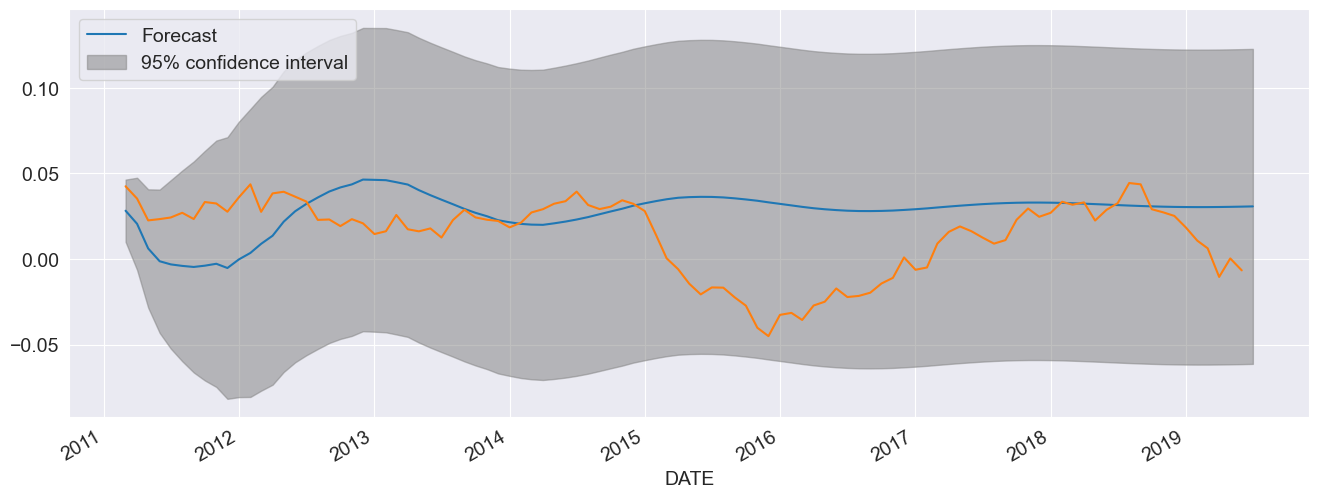

In [ ]:
fig = res_glob.plot_predict(start=ind_prod[:-100].shape[0], end=ind_prod[:-100].shape[0]+100)
subset.plot()
plt.show()

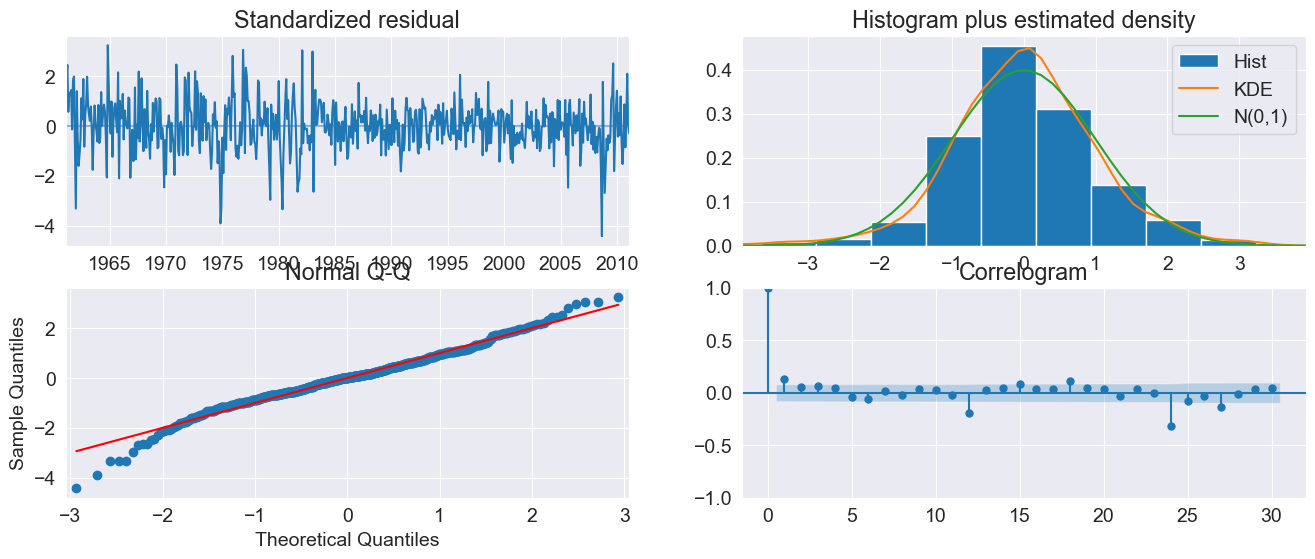

In [85]:
res_glob.plot_diagnostics(lags=30)
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#forecast = res_glob.forecast(steps=100)
forecast = res_glob.predict(start=614, end=713)
mse = mean_squared_error(subset, forecast)
mae = mean_absolute_error(subset, forecast)
mape = mean_absolute_percentage_error(subset, forecast)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

MSE: 0.0010
MAE: 0.0241
MAPE: 3.2449


In [88]:
# on the whole dataset

sel = ar_select_order(ind_prod, 13, "bic", old_names=False)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2321.382
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Fri, 10 Jan 2025   AIC                          -4612.763
Time:                        15:42:37   BIC                          -4544.476
Sample:                    02-01-1961   HQIC                         -4586.368
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      2.783      0.005       0.000       0.002
INDPRO.L1      1.1577      0.035     33.179      0.000       1.089       1.226
INDPRO.L2     -0.0822      0.053     -1.543      0.1

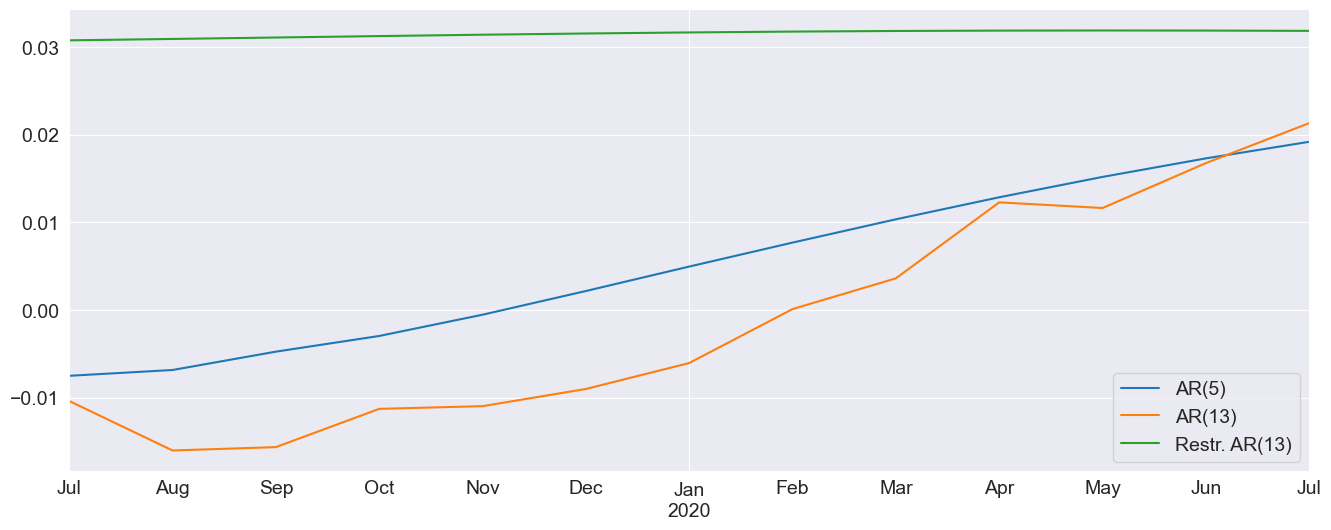

In [89]:
res_ar5 = AutoReg(ind_prod, 5, old_names=False).fit()
predictions = pd.DataFrame(
    {
        "AR(5)": res_ar5.predict(start=714, end=726),
        "AR(13)": res.predict(start=714, end=726),
        "Restr. AR(13)": res_glob.predict(start=714, end=726),
    }
)
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)


In [95]:
# SARIMAX

from statsmodels.tsa.api import SARIMAX

sarimax_mod = SARIMAX(ind_prod[:-100], order=((1, 5, 12, 13), 0, 0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            INDPRO   No. Observations:                  614
Model:             SARIMAX([1, 5, 12, 13], 0, 0)   Log Likelihood                1952.462
Date:                           Fri, 10 Jan 2025   AIC                          -3892.924
Time:                                   16:13:10   BIC                          -3866.404
Sample:                               01-01-1960   HQIC                         -3882.611
                                    - 02-01-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.447      0.014       0.000       0.002
ar.L1          1.0825      0.011     97.578

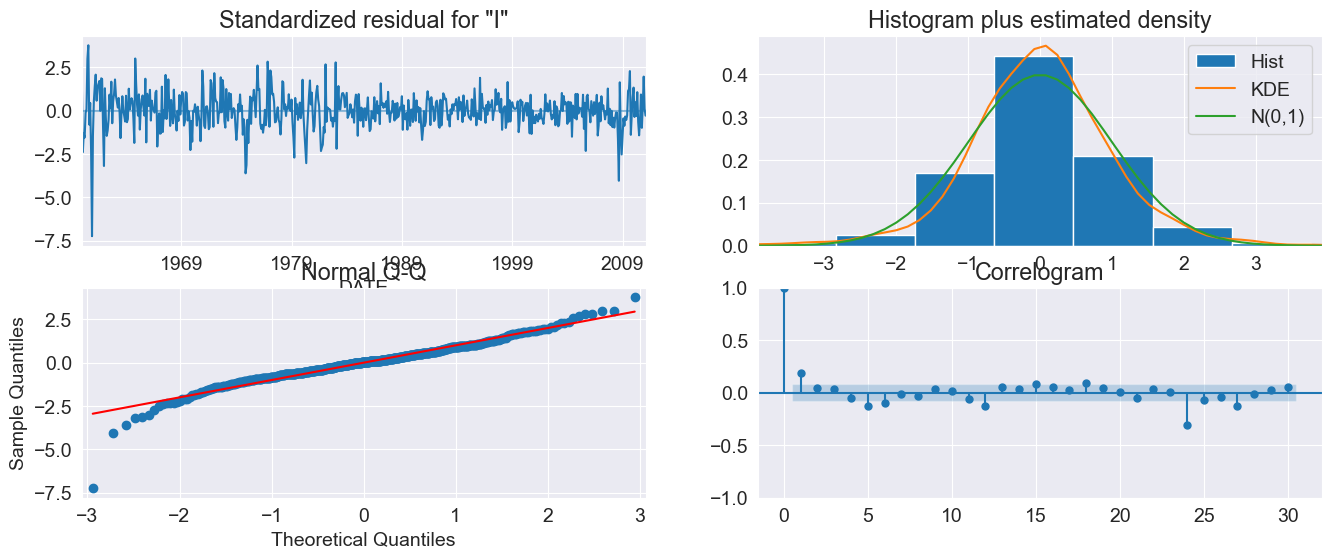

In [96]:
sarimax_res.plot_diagnostics(lags=30)
plt.show()

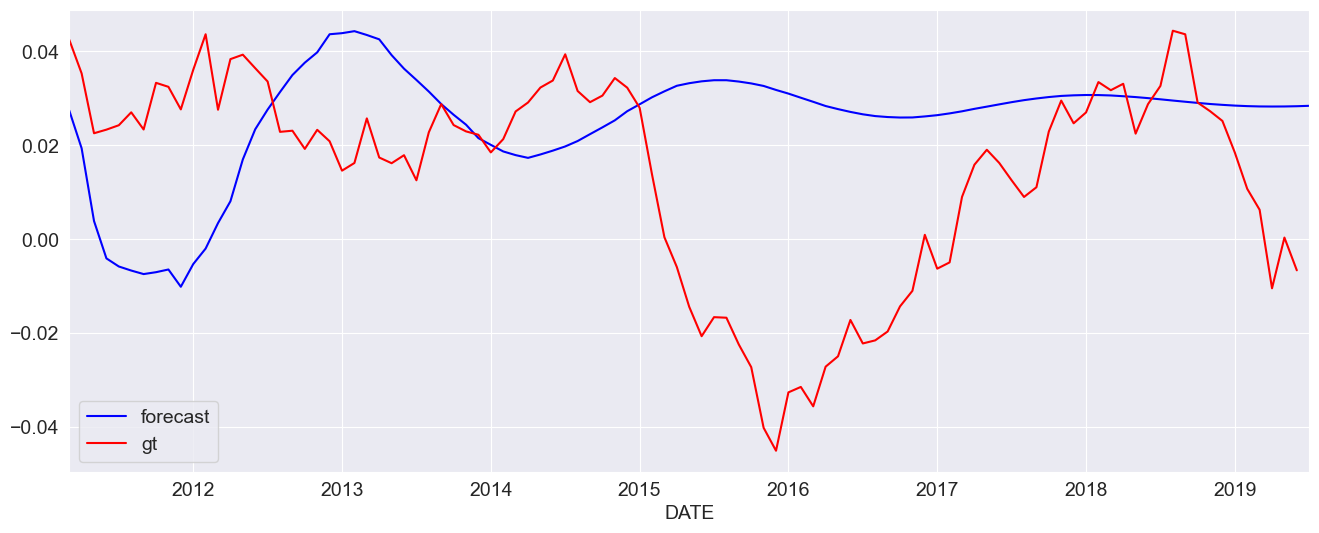

In [103]:
fig = sarimax_res.predict(start=ind_prod[:-100].shape[0], end=ind_prod[:-100].shape[0]+100)
fig.plot(label='forecast',color='blue')
subset.plot(label='gt', color='red')
plt.legend()
plt.show()

In [104]:
forecast = sarimax_res.predict(start=614, end=713)
mse = mean_squared_error(subset, forecast)
mae = mean_absolute_error(subset, forecast)
mape = mean_absolute_percentage_error(subset, forecast)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

MSE: 0.0009
MAE: 0.0238
MAPE: 3.0214


# ora con la mia metodologia, SARIMAX

In [ ]:
# benchmarks:
# AR: -4600
# SARIMAX: -3900

# nota: più è piccolo AIC meglio è quindi per ora il migliore è AR (forse SARIMAX non è stato settato bene in termini di ordini)

In [105]:
# determino s,p,d,q

trainSet = ind_prod[:-100]
testSet = ind_prod[-100:]

<Axes: xlabel='DATE'>

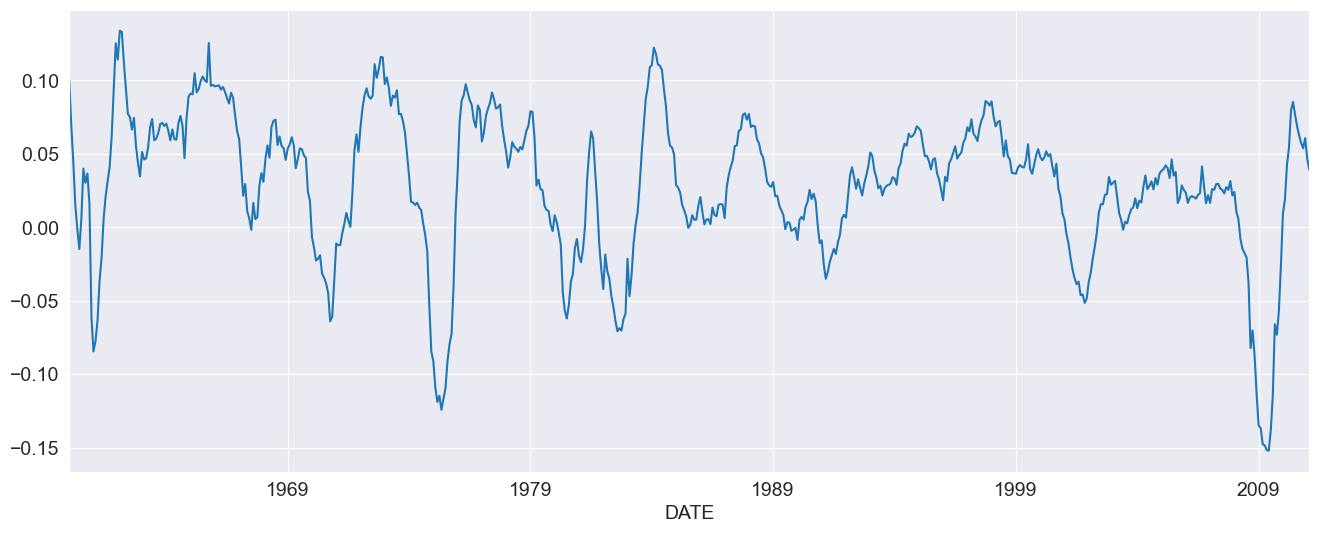

In [108]:
trainSet.plot()

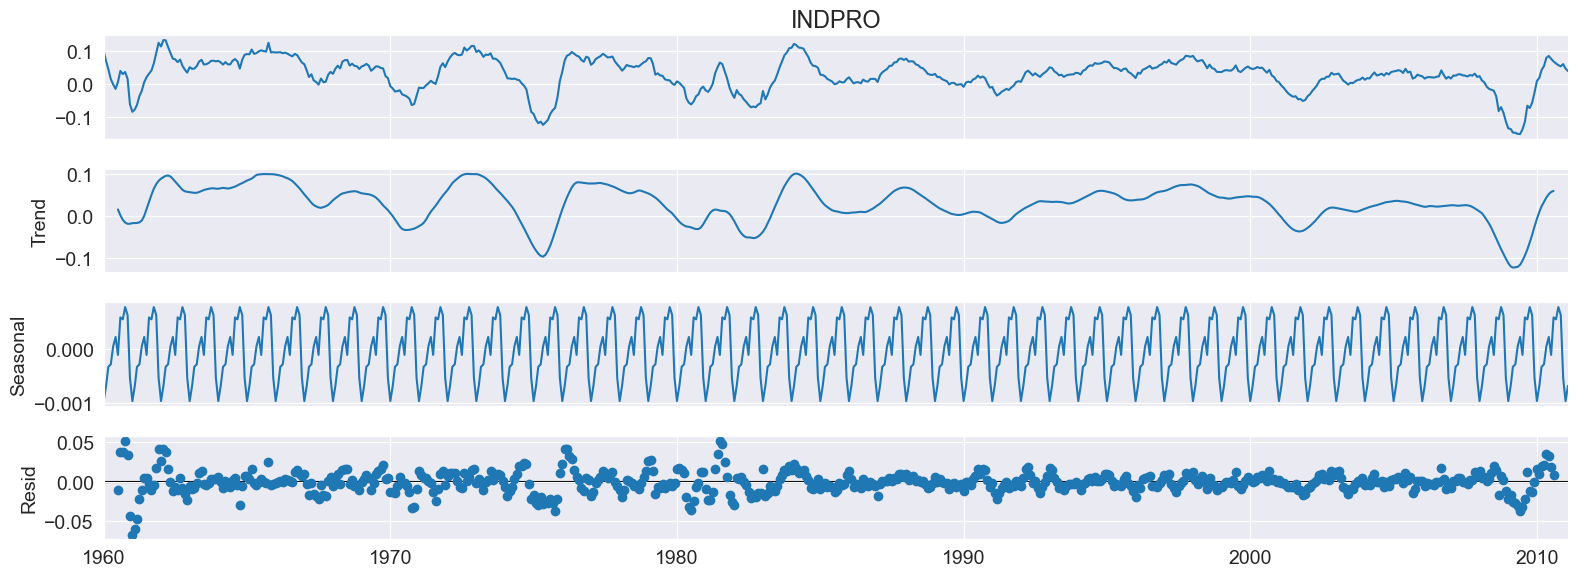

In [118]:
# check for seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

sDec = seasonal_decompose(trainSet, model='additive')
sDec.plot()
plt.show()

<Axes: xlabel='DATE'>

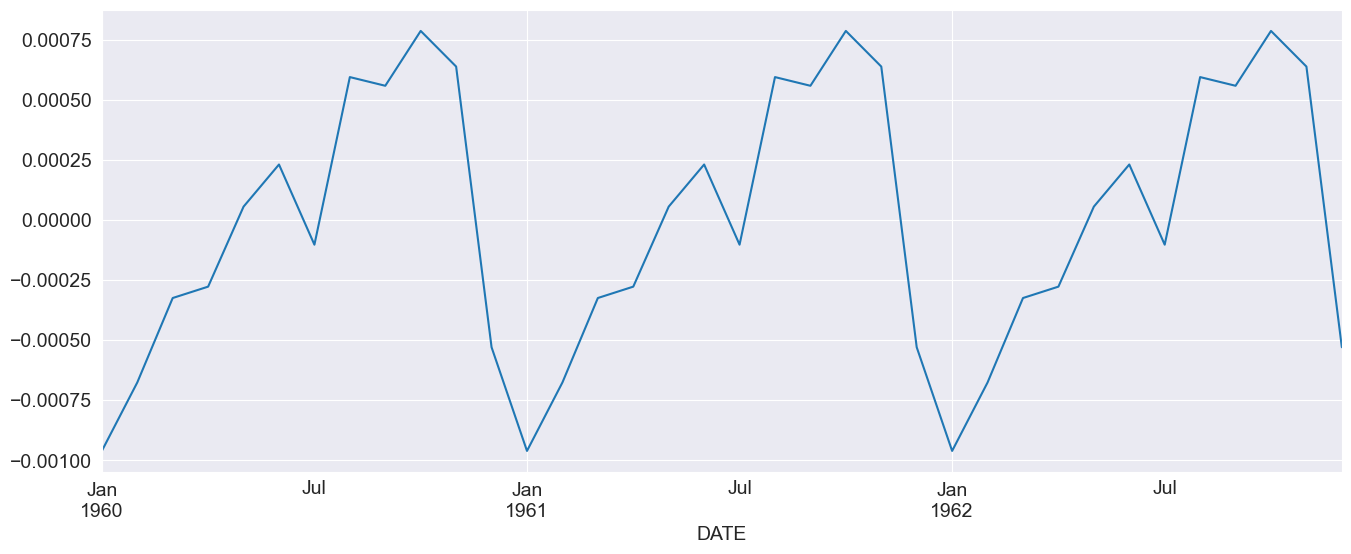

In [122]:
sDec.seasonal[:36].plot()  # s = 12 ?

# P

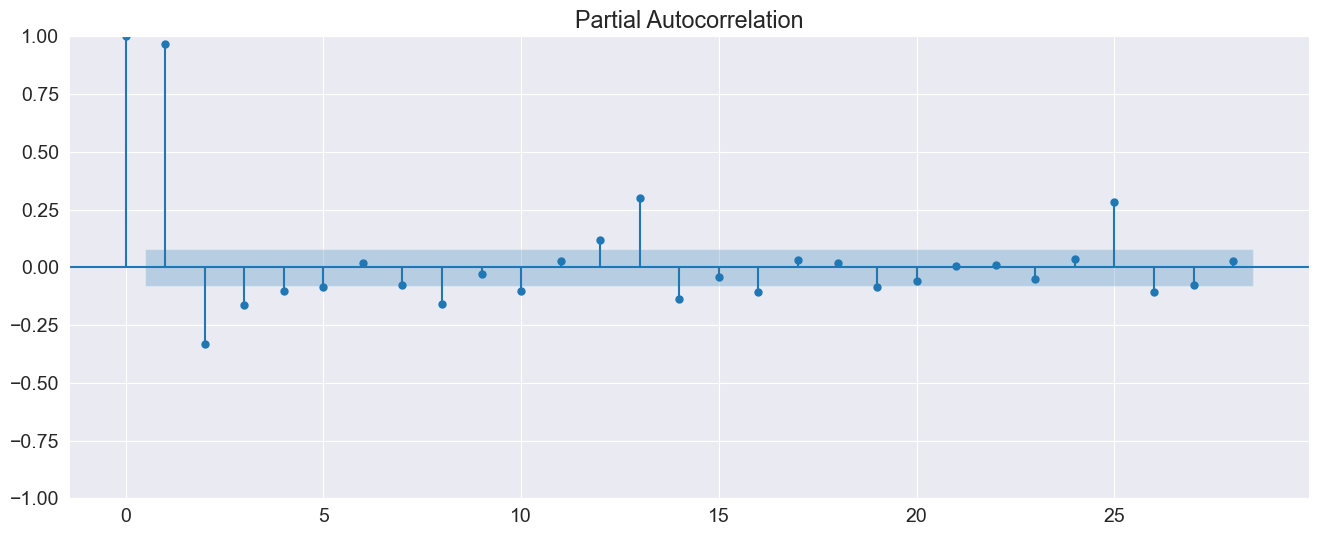

In [123]:
plot_pacf(trainSet)
plt.show()  # proverei con p=3 o p=12

# D

In [124]:
# ad-fuller test

from statsmodels.tsa.stattools import adfuller
result = adfuller(trainSet)
print(result)  # first value is adf score, second is p-value --> less than 0.05 --> d=0

(-5.180662421797982, 9.627506570116608e-06, 15, 598, {'1%': -3.4413325959192393, '5%': -2.86638530474078, '10%': -2.569350430308386}, -3891.359455691415)


# Q

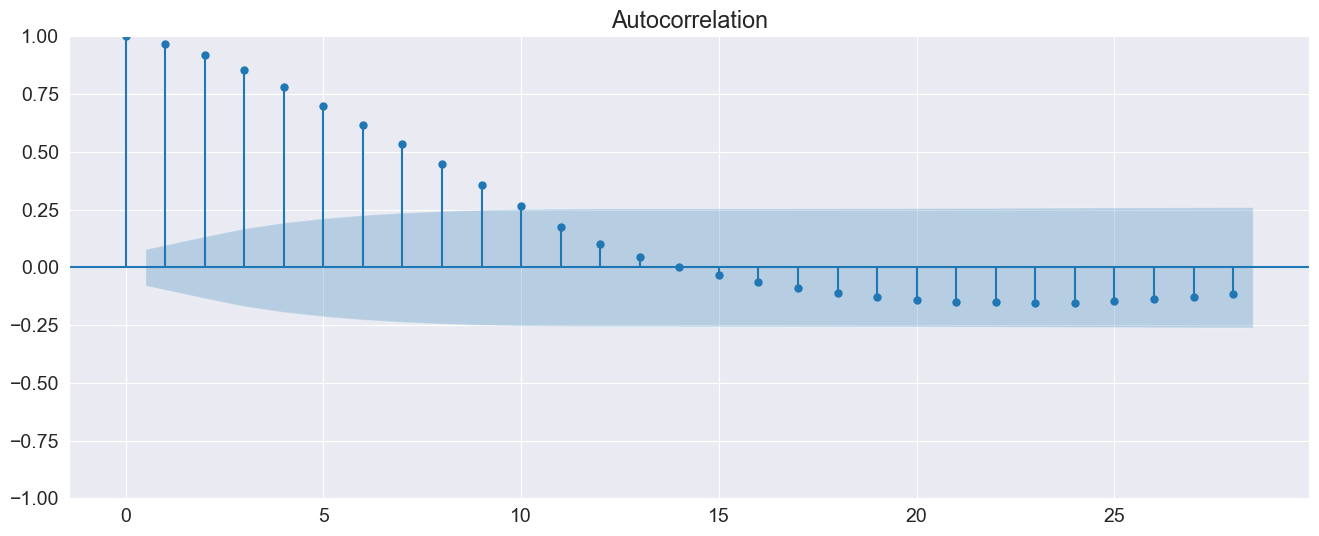

In [125]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(trainSet)
plt.show()  # q=9 o q=10

In [ ]:
'''
from pmdarima import auto_arima

stepwise_fit = auto_arima(trainSet, 
                          seasonal=True, 
                          m=12,  # Periodo stagionale
                          trace=True, 
                          suppress_warnings=True)
print(stepwise_fit.summary())
'''

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-4092.530, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-3679.787, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-3883.626, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-3681.744, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-4092.089, Time=0.81 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-3892.551, Time=0.75 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-4112.260, Time=3.96 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-3998.578, Time=1.11 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-4101.082, Time=3.36 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=-4088.833, Time=3.06 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=-4091.731, Time=3.27 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=-4077.820, Time=4.20 sec
 ARIMA(2,1,3)(2,0

# SEASONAL ORDER DETERMINATION

# SEASONAL P

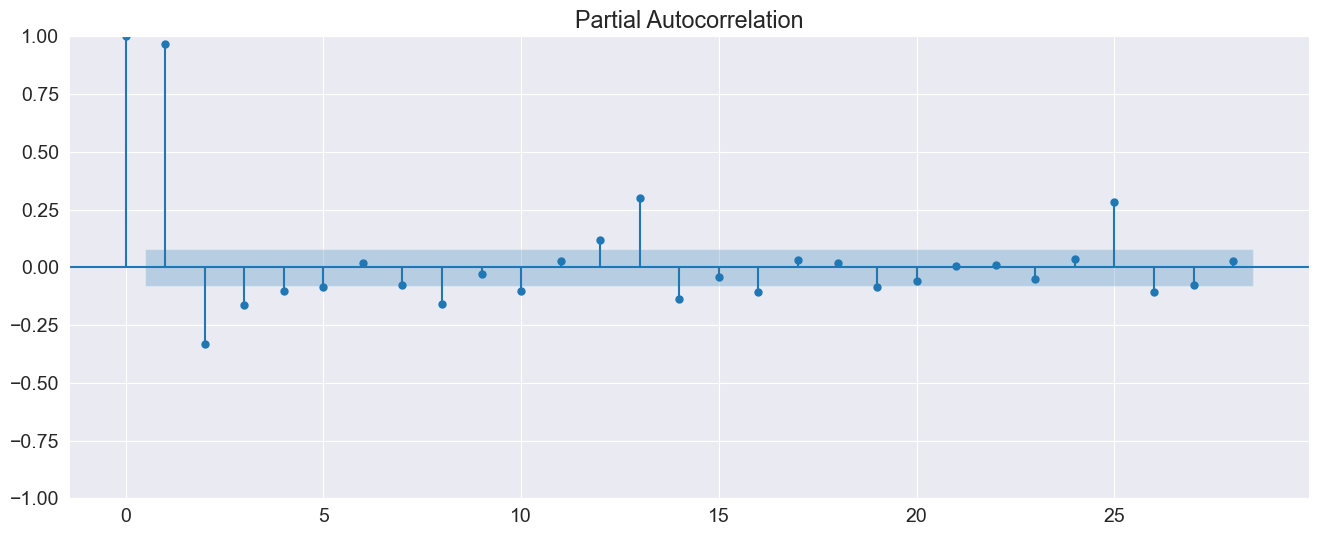

In [144]:
plot_pacf(trainSet)
plt.show()

# SEASONAL D

In [ ]:
# nel nostro caso è già stazionaria, D=0

<Axes: xlabel='DATE'>

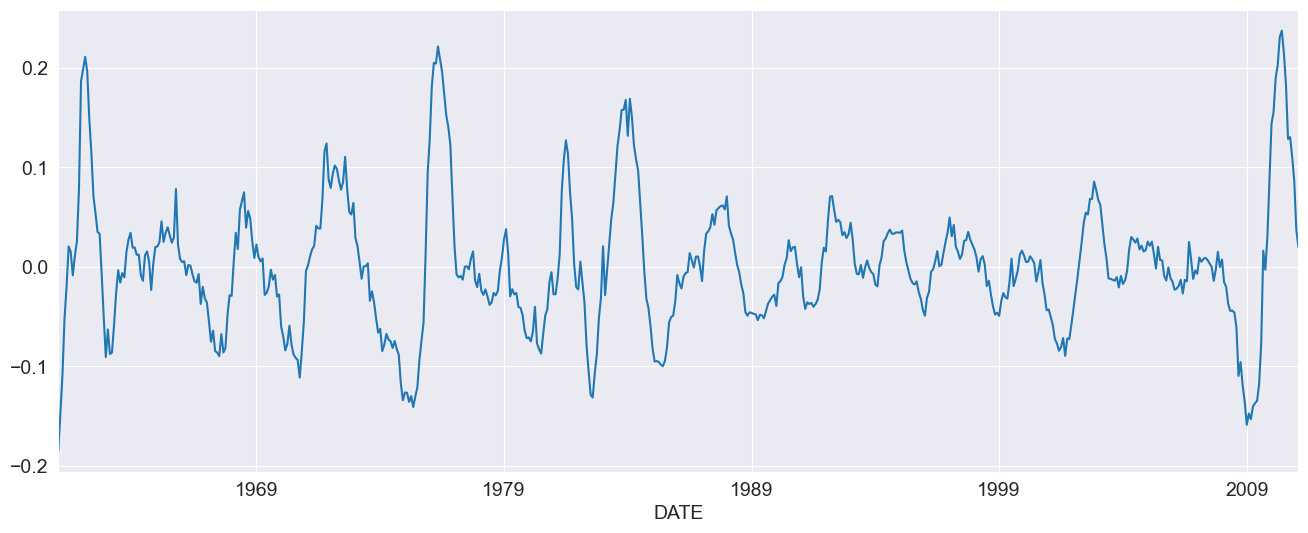

In [139]:
from statsmodels.tsa.statespace.tools import diff

diffplot = diff(trainSet, k_diff=0, k_seasonal_diff=1, seasonal_periods=12)
diffplot.plot()

In [140]:
# ad-fuller test

from statsmodels.tsa.stattools import adfuller
result = adfuller(diffplot)
print(result)

(-7.084285427116256, 4.58105977295112e-10, 19, 582, {'1%': -3.441635870156286, '5%': -2.866518854162241, '10%': -2.569421591856497}, -3362.6793638262825)


# SEASONAL Q

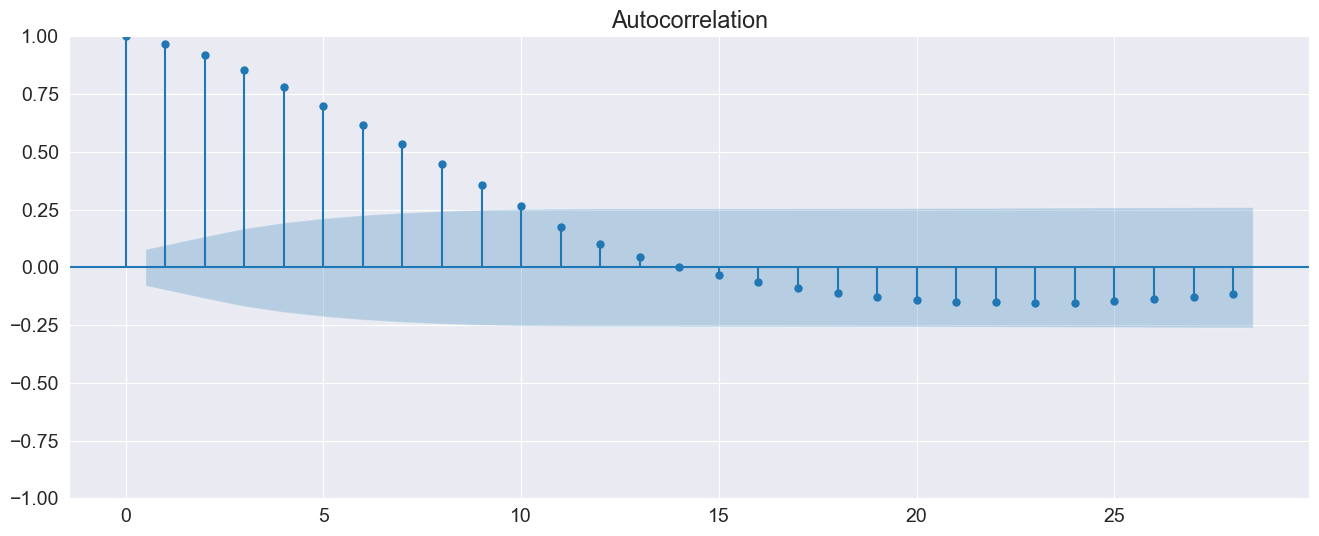

In [143]:
plot_acf(trainSet)
plt.show()

In [149]:
sarimax_mod = SARIMAX(trainSet, order= (12,0,9), seasonal_order=(0,0,1,12))
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

c:\Users\matti\anaconda3\envs\timeSeries\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                       SARIMAX Results                                       
Dep. Variable:                                INDPRO   No. Observations:                  614
Model:             SARIMAX(12, 0, 9)x(0, 0, [1], 12)   Log Likelihood                2030.517
Date:                               Fri, 10 Jan 2025   AIC                          -4015.033
Time:                                       19:11:26   BIC                          -3913.374
Sample:                                   01-01-1960   HQIC                         -3975.500
                                        - 02-01-2011                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9434      0.137      6.868      0.000       0.674       1.213
ar.L2      

c:\Users\matti\anaconda3\envs\timeSeries\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


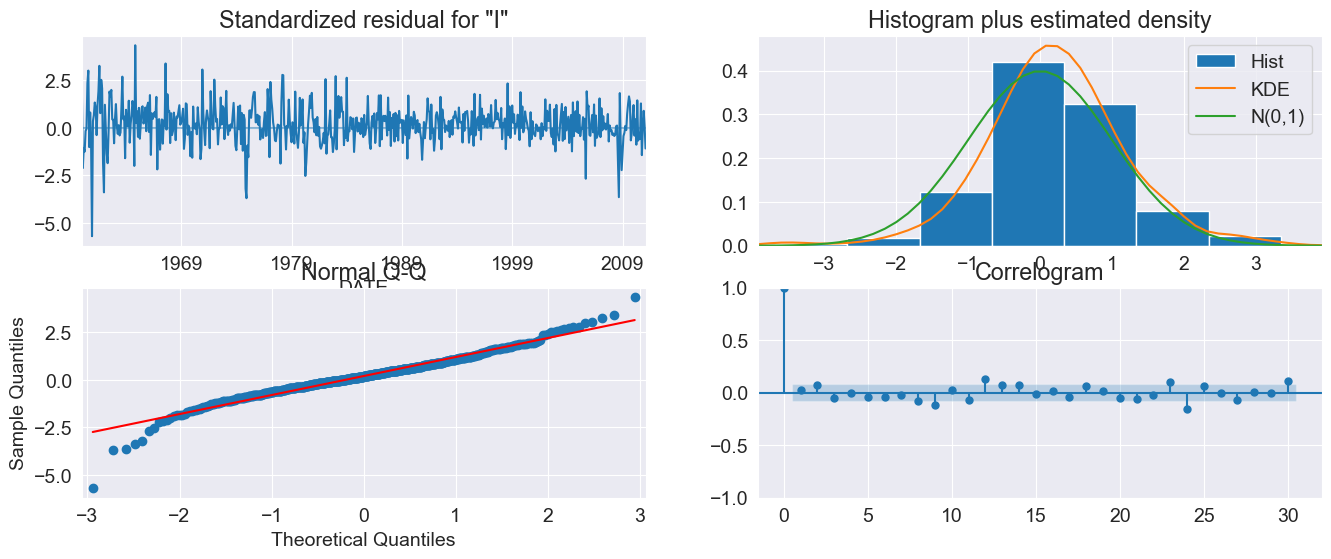

In [150]:
sarimax_res.plot_diagnostics(lags=30)
plt.show()

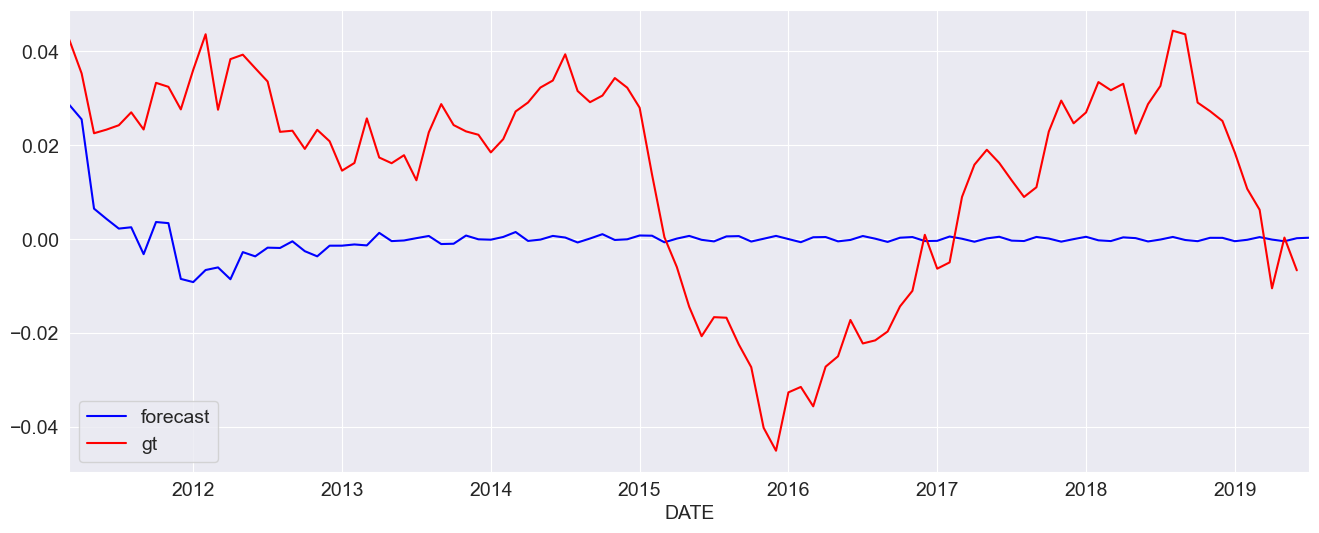

In [153]:
fig = sarimax_res.predict(start=trainSet.shape[0], end=trainSet.shape[0] + testSet.shape[0])
fig.plot(label='forecast',color='blue')
testSet.plot(label='gt', color='red')
plt.legend()
plt.show()

In [ ]:
# loop over pdq to search for the best one (criteria: AIC the lowest)

dValues = [0, 1]
pValues = [1, 3, 9]  # Rimuovi 12 e valori che potrebbero sovrapporsi a P
qValues = [9, 10]
DValues = [0, 1]
PValues = [0, 1, 2]  # Assicurati che P non contenga valori problematici
QValues = [0, 1, 2]

aicMin = 100000

for d in dValues:
    for p in pValues:
        for q in qValues:
            for Dd in DValues:
                for Pp in PValues:
                    for Qq in QValues:
                        model = SARIMAX(trainSet, order=(p, d, q), seasonal_order=(Pp,Dd,Qq,12))
                        model_fit = model.fit()
                        if model_fit.aic < aicMin:
                            aicMin = model_fit.aic
                            bD,bP,bQ, bestD, bestP, bestQ = d,p,q,Dd,Pp,Qq
print(f'best AIC:{aicMin}, obtained with d:{bD}, p:{bP}, q:{bQ}, D:{bestD}, P:{bestP}, Q:{bestQ}')

In [155]:
sarimax_mod = SARIMAX(trainSet, order= (bP,bD,bQ), seasonal_order=(bestP, bestD, bestQ, 12))
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

c:\Users\matti\anaconda3\envs\timeSeries\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                  INDPRO   No. Observations:                  614
Model:             SARIMAX(1, 1, 9)x(2, 0, [1, 2], 12)   Log Likelihood                2082.662
Date:                                 Fri, 10 Jan 2025   AIC                          -4135.324
Time:                                         20:45:19   BIC                          -4069.048
Sample:                                     01-01-1960   HQIC                         -4109.549
                                          - 02-01-2011                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3606      0.289      1.246      0.213      -0.207       0

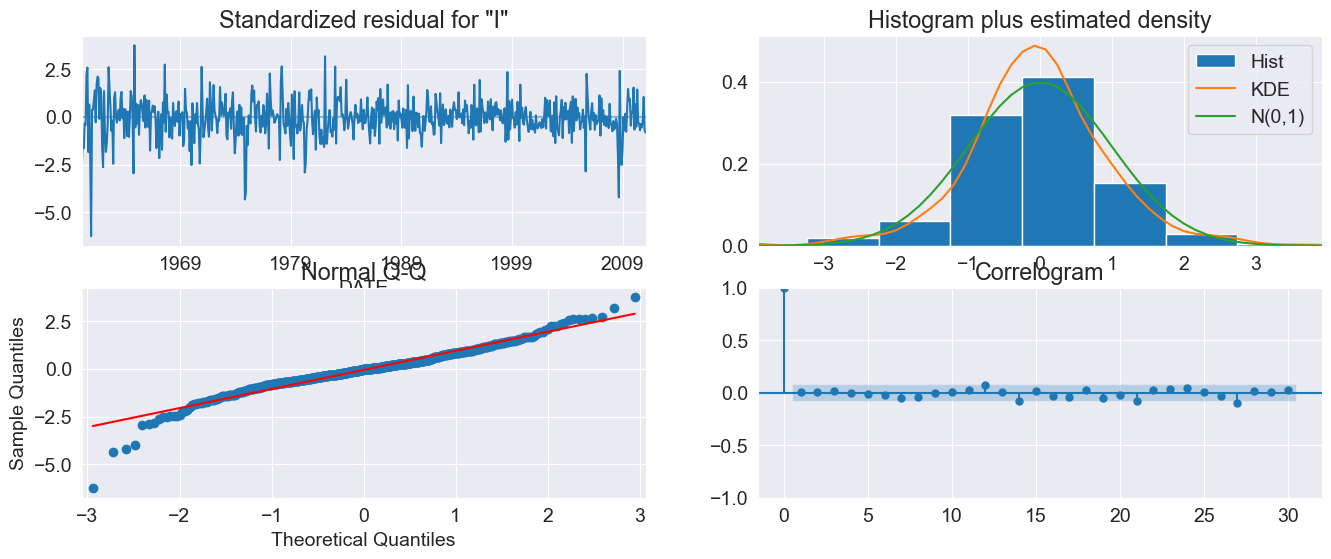

In [156]:
sarimax_res.plot_diagnostics(lags=30)
plt.show()

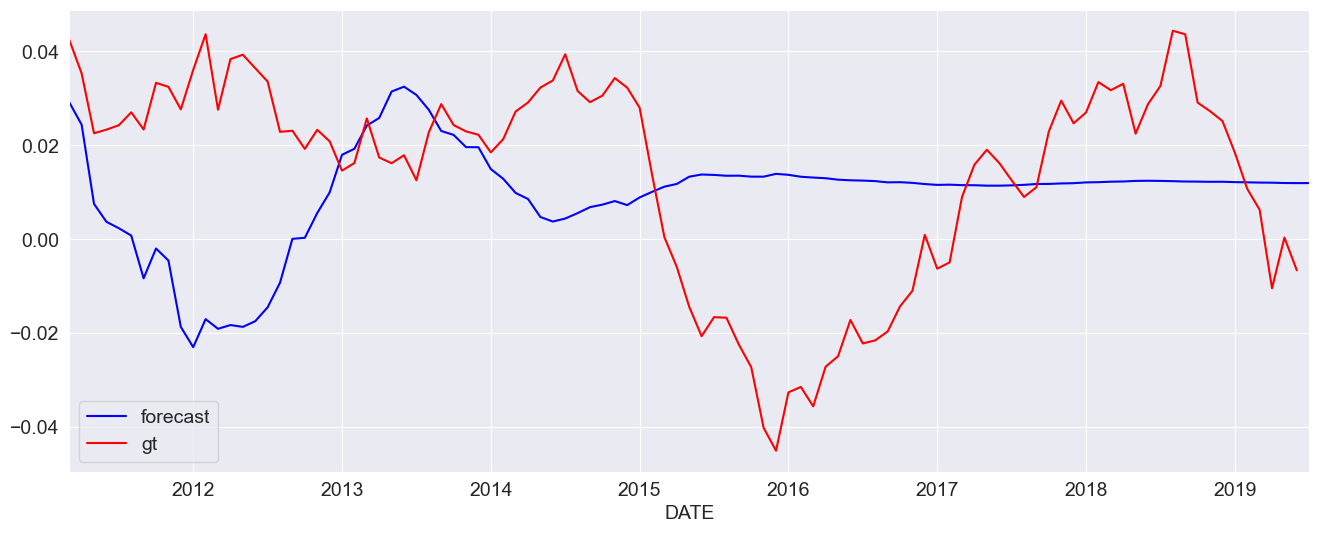

In [157]:
fig = sarimax_res.predict(start=trainSet.shape[0], end=trainSet.shape[0] + testSet.shape[0])
fig.plot(label='forecast',color='blue')
testSet.plot(label='gt', color='red')
plt.legend()
plt.show()